<a href="https://colab.research.google.com/github/Maoeyu/Github-Colab/blob/main/RTMPose_Homework_Ear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

题目：基于RTMPose的耳朵穴位关键点检测

背景：根据中医的“倒置胎儿”学说，耳朵的穴位反映了人体全身脏器的健康，耳穴按摩可以缓解失眠多梦、内分泌失调等疾病。耳朵面积较小，但穴位密集，涉及耳舟、耳轮、三角窝、耳甲艇、对耳轮等三维轮廓，普通人难以精准定位耳朵穴位。

任务 1.Labelme标注关键点检测数据集（子豪兄已经帮你完成了） 2.划分训练集和测试集（子豪兄已经帮你完成了） 3.Labelme标注转MS COCO格式（子豪兄已经帮你完成了） 4.使用MMDetection算法库，训练RTMDet耳朵目标检测算法，提交测试集评估指标 5.使用MMPose算法库，训练RTMPose耳朵关键点检测算法，提交测试集评估指标 6.用自己耳朵的图像预测，将预测结果发到群里 7.用自己耳朵的视频预测，将预测结果发到群里 需提交的测试集评估指标（不能低于baseline指标的50%）
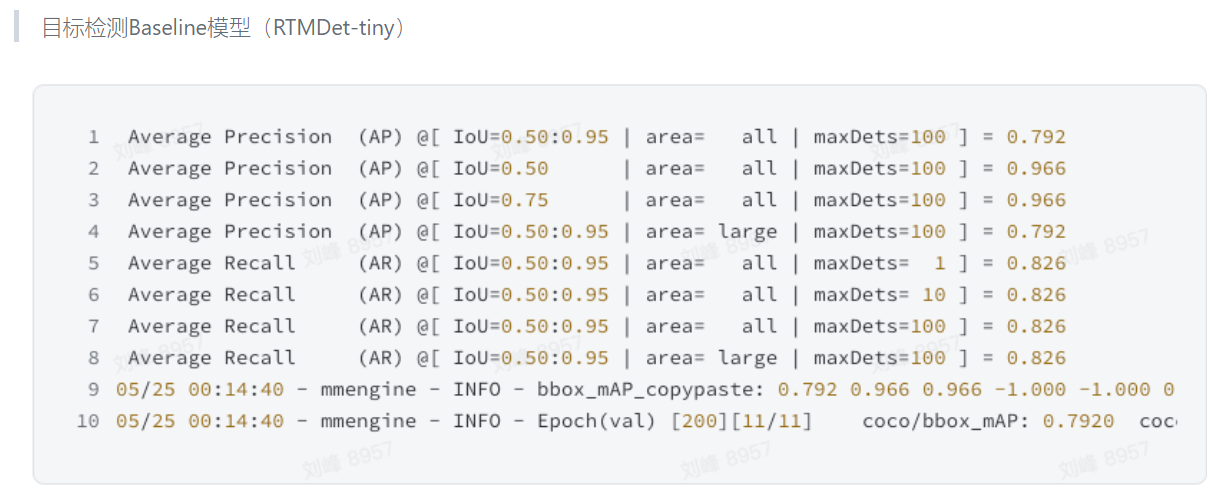
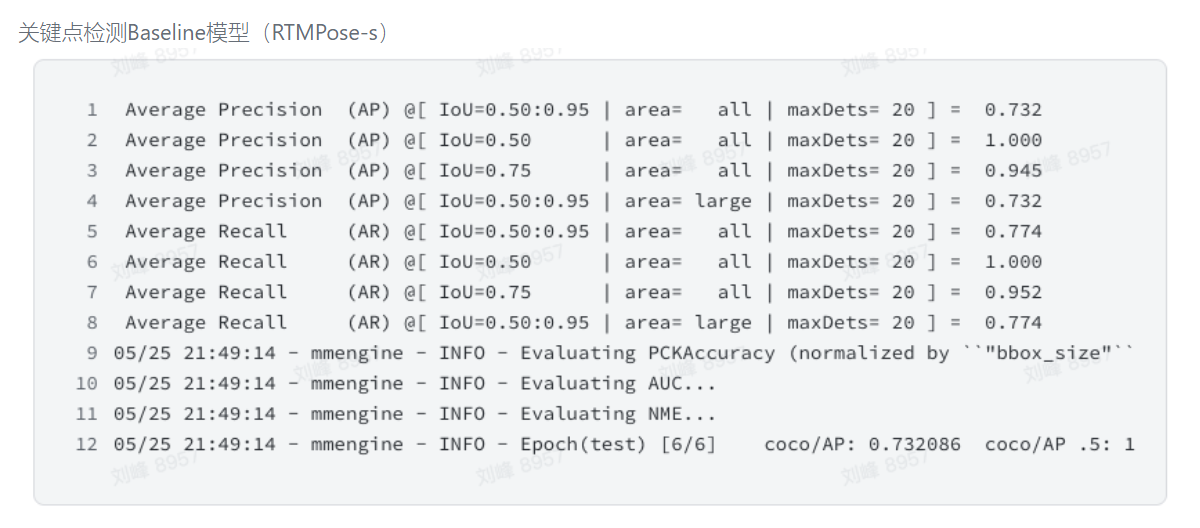
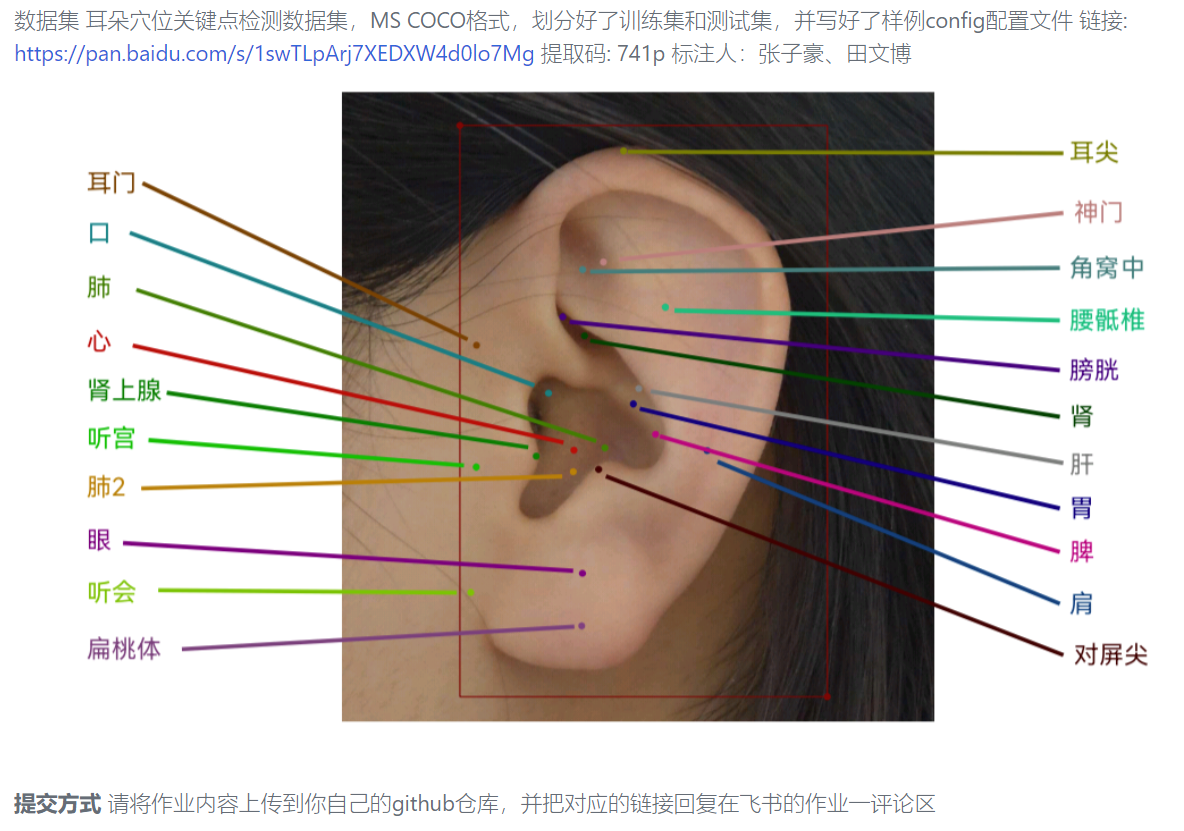
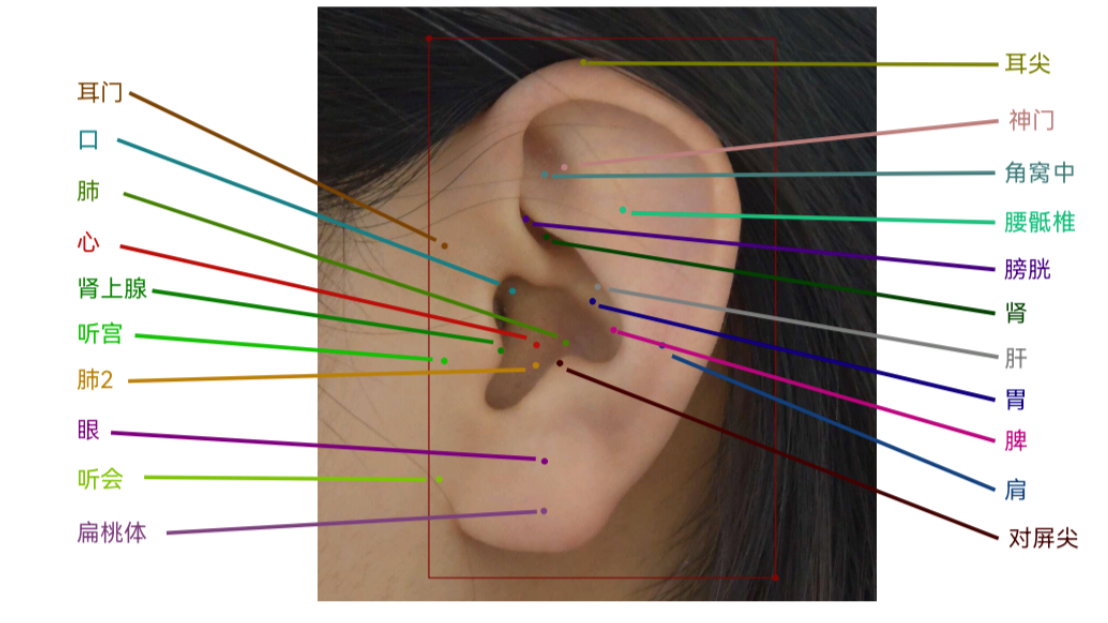

MMDetection环境预准备

In [1]:
%pip install -U openmim
!mim install mmengine
!mim install "mmcv>=2.0.0"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 6.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.0.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.3/374.3 kB 31.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.9/200.9 kB 29.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.0.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.4/74.4 MB 8.7 MB/s eta 0:00:00


In [2]:
%pip install git+https://github.com/jin-s13/xtcocoapi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/jin-s13/xtcocoapi to /tmp/pip-req-build-iqdhr_aa
  Running command git clone --filter=blob:none --quiet https://github.com/jin-s13/xtcocoapi /tmp/pip-req-build-iqdhr_aa
  Resolved https://github.com/jin-s13/xtcocoapi to commit 86a60cab276e619dac5d22834a36dceaf7aa0a38
  Preparing metadata (setup.py) ... done
  Created wheel for xtcocotools: filename=xtcocotools-1.13-cp310-cp310-linux_x86_64.whl size=390276 sha256=e56f6eb669295e837a5cf378059fda6a938437fa7ac0f75781ff9e943428e280
  Stored in directory: /tmp/pip-ephem-wheel-cache-tzi7za4y/wheels/ef/1b/6b/bca3cf15bb2e536384aa0cff349cfe87a1450847473b241cf0
Successfully built xtcocotools


In [3]:
!git clone https://github.com/open-mmlab/mmdetection.git
%cd mmdetection
!pip install -v -e .
# "-v" 指详细说明，或更多的输出
# "-e" 表示在可编辑模式下安装项目，因此对代码所做的任何本地修改都会生效，从而无需重新安装。

Cloning into 'mmdetection'...
remote: Enumerating objects: 36296, done.
remote: Counting objects: 100% (947/947), done.
remote: Compressing objects: 100% (534/534), done.
remote: Total 36296 (delta 482), reused 711 (delta 400), pack-reused 35349
Receiving objects: 100% (36296/36296), 56.73 MiB | 18.02 MiB/s, done.
Resolving deltas: 100% (25417/25417), done.
/content/mmdetection
Using pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/mmdetection
  Running command python setup.py egg_info
  running egg_info
  creating /tmp/pip-pip-egg-info-llt9hsd_/mmdet.egg-info
  writing /tmp/pip-pip-egg-info-llt9hsd_/mmdet.egg-info/PKG-INFO
  writing dependency_links to /tmp/pip-pip-egg-info-llt9hsd_/mmdet.egg-info/dependency_links.txt
  writing requirements to /tmp/pip-pip-egg-info-llt9hsd_/mmdet.egg-info/requires.txt
  writing top-level names to /tmp/pi

训练数据准备

In [4]:
#还得是李哥 
!gdown https://drive.google.com/uc?id=1VWKYi6WSbB6tbPfnDtUp8gpiLTXzfbzZ  

Downloading...
From: https://drive.google.com/uc?id=1VWKYi6WSbB6tbPfnDtUp8gpiLTXzfbzZ
To: /content/mmdetection/MMPose作业.zip
100% 712M/712M [00:03<00:00, 215MB/s]


In [5]:
# 解压zip
# 删除zip文件释放存储空间
!unzip MMPose作业.zip -d ./data  
!rm MMPose作业.zip  

Archive:  MMPose作业.zip
  inflating: ./data/Ear210_Dataset_coco.zip  
   creating: ./data/样例config配置文件/
  inflating: ./data/样例config配置文件/rtmdet_tiny_ear.py  
  inflating: ./data/样例config配置文件/rtmpose-s-ear.py  


In [6]:
#进入 /data中
%cd /content/mmdetection/data

/content/mmdetection/data


In [7]:
!unzip Ear210_Dataset_coco.zip -d ./
!rm Ear210_Dataset_coco.zip

Archive:  Ear210_Dataset_coco.zip
   creating: ./Ear210_Keypoint_Dataset_coco/
   creating: ./Ear210_Keypoint_Dataset_coco/images/
  inflating: ./Ear210_Keypoint_Dataset_coco/images/IMG_0941.jpg  
  inflating: ./Ear210_Keypoint_Dataset_coco/images/mmexport1684491454710.jpg  
  inflating: ./Ear210_Keypoint_Dataset_coco/images/mmexport1684491405205.jpg  
  inflating: ./Ear210_Keypoint_Dataset_coco/images/IMG_1134.jpg  
  inflating: ./Ear210_Keypoint_Dataset_coco/images/mmexport1684491492804.jpg  
  inflating: ./Ear210_Keypoint_Dataset_coco/images/DSC_5809.jpg  
  inflating: ./Ear210_Keypoint_Dataset_coco/images/IMG_0821.jpg  
  inflating: ./Ear210_Keypoint_Dataset_coco/images/mmexport1684491445231.jpg  
  inflating: ./Ear210_Keypoint_Dataset_coco/images/IMG_0612.jpg  
  inflating: ./Ear210_Keypoint_Dataset_coco/images/mmexport1684491343396.jpg  
  inflating: ./Ear210_Keypoint_Dataset_coco/images/mmexport1684491370006.jpg  
  inflating: ./Ear210_Keypoint_Dataset_coco/images/mmexport168449

In [8]:
#回去
%cd /content/mmdetection

/content/mmdetection


# Train
更改了rtmdet_tiny_ear.py的参数：
lr = 0.02
MAX_EPOCH = 140

In [9]:
import torch
if torch.cuda.is_available():
    print('GPU已启用')
else:
    print('未检测到可用的GPU')

GPU已启用


In [10]:
!python ./tools/train.py data/样例config配置文件/rtmdet_tiny_ear.py

06/04 02:59:16 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.11 (main, Apr  5 2023, 14:15:10) [GCC 9.4.0]
    CUDA available: True
    numpy_random_seed: 866693978
    GPU 0: Tesla T4
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.8, V11.8.89
    GCC: x86_64-linux-gnu-gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
    PyTorch: 2.0.1+cu118
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.7.3 (Git Hash 6dbeffbae1f23cbbeae17adb7b5b13f1f37c080e)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.8
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,

In [13]:
#测试阶段
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='test1.jpg', quality=0.6):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to test1.jpg


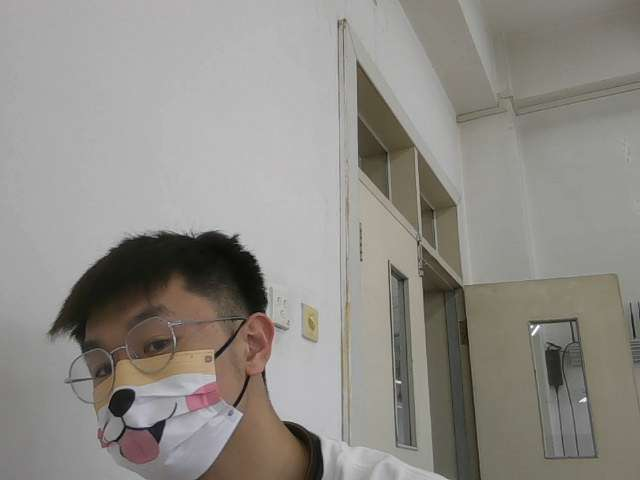

In [14]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [16]:
#测试开始
%cd /content/mmdetection
!python demo/image_demo.py \
        test1.jpg \
        data/样例config配置文件/rtmdet_tiny_ear.py \
        --weights work_dirs/rtmdet_tiny_ear/best_coco_bbox_mAP_epoch_140.pth \
        --out-dir outputs/E2_rtmdet \
        --device cuda:0 \
        --pred-score-thr 0.3

/content/mmdetection
Loads checkpoint by local backend from path: work_dirs/rtmdet_tiny_ear/best_coco_bbox_mAP_epoch_140.pth
06/04 06:04:30 - mmengine - WARNING - Failed to search registry with scope "mmdet" in the "function" registry tree. As a workaround, the current "function" registry in "mmengine" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmdet" is a correct scope, or whether the registry is initialized.
06/04 06:04:30 - mmengine - WARNING - `Visualizer` backend is not initialized because save_dir is None.
/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: 
torch.meshgrid: in an upcoming release, it will be required to pass the indexing
argument. (Triggered internally at 
../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Inference ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━   
results have been saved at outputs/E2_rtmd

In [17]:
#Colab视频阶段
%cd /content/mmdetection
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import numpy as np

def record_video(filename='video.webm'):
    js = Javascript("""
    async function recordVideo() {
        const options = { mimeType: "video/webm; codecs=vp9" };
        const div = document.createElement('div');
        const capture = document.createElement('button');
        capture.textContent = "Start Recording";
        div.appendChild(capture);

        const video = document.createElement('video');
        video.style.display = 'block';
        const stream = await navigator.mediaDevices.getUserMedia({video: true});

        let recorder = new MediaRecorder(stream, options);
        document.body.appendChild(div);
        div.appendChild(video);
        video.srcObject = stream;
        await video.play();

        google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

        await new Promise((resolve) => {
            capture.onclick = resolve;
        });
        recorder.start();
        capture.textContent = "Stop Recording";
        await new Promise((resolve) => capture.onclick = resolve);
        recorder.stop();

        // Stop the device camera stream
        stream.getTracks()[0].stop();

        let recData = await new Promise((resolve) => recorder.ondataavailable = resolve);
        let arrBuffer = await recData.data.arrayBuffer(); 

        const binaryString = Array.from(new Uint8Array(arrBuffer)).map(bin => String.fromCharCode(bin)).join('');
        const base64String = btoa(binaryString);
        return base64String;
    }
    """)
    display(js)
    data=eval_js('recordVideo()')
    binary = b64decode(data)
    with open(filename, "wb") as video_file:
        video_file.write(binary)
    return filename


/content/mmdetection


In [18]:
try:
    filename = record_video()
    print('Saved to {}'.format(filename))
except Exception as err:
    print(str(err))

<IPython.core.display.Javascript object>

Saved to video.webm


In [19]:
import subprocess

def convert_to_mp4(input_file, output_file):
    command = ['ffmpeg', '-i', input_file, output_file]
    subprocess.run(command, stdout=subprocess.PIPE, stderr=subprocess.PIPE)

# Call the function
convert_to_mp4('video.webm', 'video.mp4')

In [20]:
###这段实在不懂！ 
import cv2

#实例化
cap = cv2.VideoCapture('video.mp4')

if not cap.isOpened():
    print("Error opening video file")

# 定义视频编码器
fourcc = cv2.VideoWriter_fourcc(*'mp4v') 

# 定义视频写入对象，指定输出文件名（例如output.mp4），编码器，帧率和视频宽高
out = cv2.VideoWriter('output.mp4', fourcc, cap.get(cv2.CAP_PROP_FPS), (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))))

while(cap.isOpened()):
    # 读取一帧
    ret, frame = cap.read()

    if ret:
        # 将帧写入新视频
        out.write(frame)
    else:
        break

# 在结束后释放VideoCapture和VideoWriter对象
cap.release()
out.release()


In [21]:
# RTMDet-视频
%cd /content/mmdetection
!python demo/video_demo.py \
        output.mp4 \
        data/样例config配置文件/rtmdet_tiny_ear.py \
        work_dirs/rtmdet_tiny_ear/best_coco_bbox_mAP_epoch_140.pth \
        --device cuda:0 \
        --score-thr 0.6 \
        --out outputs/E2_out_video_rtmdet.mp4

/content/mmdetection
Loads checkpoint by local backend from path: work_dirs/rtmdet_tiny_ear/best_coco_bbox_mAP_epoch_140.pth
06/04 06:08:58 - mmengine - WARNING - `Visualizer` backend is not initialized because save_dir is None.
[                                                  ] 0/10222, elapsed: 0s, ETA:/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
[>>] 10222/10222, 8.0 task/s, elapsed: 1283s, ETA:     0s


In [22]:
#MMPose关键点阶段
%cd /content 

/content


In [23]:
!git clone https://github.com/open-mmlab/mmpose.git
# The master branch is version 1.x 
%cd mmpose
%pip install -r requirements.txt
%pip install -v -e .

Cloning into 'mmpose'...
remote: Enumerating objects: 27394, done.
remote: Counting objects: 100% (1216/1216), done.
remote: Compressing objects: 100% (623/623), done.
remote: Total 27394 (delta 652), reused 1007 (delta 574), pack-reused 26178
Receiving objects: 100% (27394/27394), 30.08 MiB | 8.63 MiB/s, done.
Resolving deltas: 100% (19325/19325), done.
/content/mmpose
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.7/228.7 kB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.3/45.3 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.6/137.6 kB 19.0 MB/s eta 0:00:00
     

In [24]:
#关键点检测数据集
!gdown https://drive.google.com/uc?id=1VWKYi6WSbB6tbPfnDtUp8gpiLTXzfbzZ

Downloading...
From: https://drive.google.com/uc?id=1VWKYi6WSbB6tbPfnDtUp8gpiLTXzfbzZ
To: /content/mmpose/MMPose作业.zip
100% 712M/712M [00:11<00:00, 63.0MB/s]


In [25]:
!unzip MMPose作业.zip -d ./data  # 解压zip
!rm MMPose作业.zip  # 删除zip文件

Archive:  MMPose作业.zip
  inflating: ./data/Ear210_Dataset_coco.zip  
   creating: ./data/样例config配置文件/
  inflating: ./data/样例config配置文件/rtmdet_tiny_ear.py  
  inflating: ./data/样例config配置文件/rtmpose-s-ear.py  


In [26]:
#定位
%cd /content/mmpose/data

/content/mmpose/data


In [27]:
!unzip Ear210_Dataset_coco.zip -d ./
!rm Ear210_Dataset_coco.zip

Archive:  Ear210_Dataset_coco.zip
   creating: ./Ear210_Keypoint_Dataset_coco/
   creating: ./Ear210_Keypoint_Dataset_coco/images/
  inflating: ./Ear210_Keypoint_Dataset_coco/images/IMG_0941.jpg  
  inflating: ./Ear210_Keypoint_Dataset_coco/images/mmexport1684491454710.jpg  
  inflating: ./Ear210_Keypoint_Dataset_coco/images/mmexport1684491405205.jpg  
  inflating: ./Ear210_Keypoint_Dataset_coco/images/IMG_1134.jpg  
  inflating: ./Ear210_Keypoint_Dataset_coco/images/mmexport1684491492804.jpg  
  inflating: ./Ear210_Keypoint_Dataset_coco/images/DSC_5809.jpg  
  inflating: ./Ear210_Keypoint_Dataset_coco/images/IMG_0821.jpg  
  inflating: ./Ear210_Keypoint_Dataset_coco/images/mmexport1684491445231.jpg  
  inflating: ./Ear210_Keypoint_Dataset_coco/images/IMG_0612.jpg  
  inflating: ./Ear210_Keypoint_Dataset_coco/images/mmexport1684491343396.jpg  
  inflating: ./Ear210_Keypoint_Dataset_coco/images/mmexport1684491370006.jpg  
  inflating: ./Ear210_Keypoint_Dataset_coco/images/mmexport168449

In [28]:
%cd /content/mmpose

/content/mmpose


In [29]:
#关键点训练
#MAX_EPOCH = 15
#LR = 0.05
!python ./tools/train.py ./data/样例config配置文件/rtmpose-s-ear.py

06/04 06:37:51 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.11 (main, Apr  5 2023, 14:15:10) [GCC 9.4.0]
    CUDA available: True
    numpy_random_seed: 21
    GPU 0: Tesla T4
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.8, V11.8.89
    GCC: x86_64-linux-gnu-gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
    PyTorch: 2.0.1+cu118
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.7.3 (Git Hash 6dbeffbae1f23cbbeae17adb7b5b13f1f37c080e)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.8
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm

In [30]:
#Photo Time
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename


<IPython.core.display.Javascript object>

Saved to photo.jpg


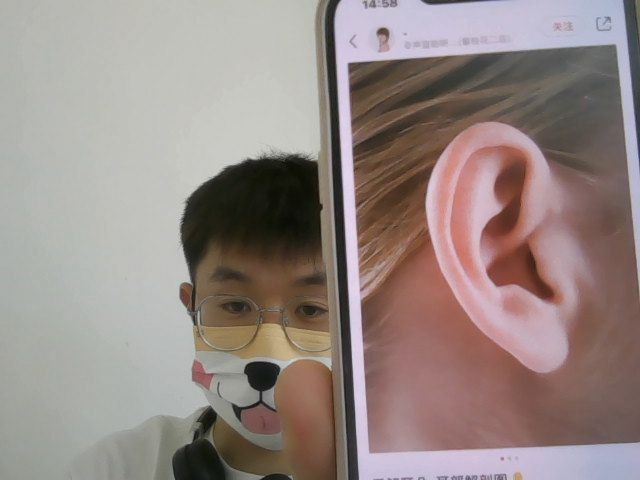

In [33]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [35]:
%cd /content/mmpose
#自顶向下！
!python demo/topdown_demo_with_mmdet.py \
        /content/mmdetection/data/样例config配置文件/rtmdet_tiny_ear.py \
        /content/mmdetection/work_dirs/rtmdet_tiny_ear/best_coco_bbox_mAP_epoch_140.pth \
        data/样例config配置文件/rtmpose-s-ear.py \
        work_dirs/rtmpose-s-ear/best_PCK_epoch_10.pth \
        --input photo.jpg \
        --output-root outputs/G2_RTMDet-RTMPose \
        --device cuda:0 \
        --bbox-thr 0.5 \
        --kpt-thr 0.5 \
        --nms-thr 0.3 \
        --radius 36 \
        --thickness 30 \
        --draw-bbox \
        --draw-heatmap \
        --show-kpt-idx

/content/mmpose
Loads checkpoint by local backend from path: /content/mmdetection/work_dirs/rtmdet_tiny_ear/best_coco_bbox_mAP_epoch_140.pth
Loads checkpoint by local backend from path: work_dirs/rtmpose-s-ear/best_PCK_epoch_10.pth
06/04 06:59:31 - mmengine - WARNING - `Visualizer` backend is not initialized because save_dir is None.
/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/content/mmpose/mmpose/models/heads/coord_cls_heads/rtmcc_head.py:217: UserWarning: The predicted simcc values are normalized for visualization. This may cause discrepancy between the keypoint scores and the 1D heatmaps.
  warnings.warn('The predicted simcc values are normalized for '


In [36]:
%cd /content/mmpose

/content/mmpose


In [37]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import numpy as np

def record_video(filename='video.webm'):
    js = Javascript("""
    async function recordVideo() {
        const options = { mimeType: "video/webm; codecs=vp9" };
        const div = document.createElement('div');
        const capture = document.createElement('button');
        capture.textContent = "Start Recording";
        div.appendChild(capture);

        const video = document.createElement('video');
        video.style.display = 'block';
        const stream = await navigator.mediaDevices.getUserMedia({video: true});

        let recorder = new MediaRecorder(stream, options);
        document.body.appendChild(div);
        div.appendChild(video);
        video.srcObject = stream;
        await video.play();

        google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

        await new Promise((resolve) => {
            capture.onclick = resolve;
        });
        recorder.start();
        capture.textContent = "Stop Recording";
        await new Promise((resolve) => capture.onclick = resolve);
        recorder.stop();

        // Stop the device camera stream
        stream.getTracks()[0].stop();

        let recData = await new Promise((resolve) => recorder.ondataavailable = resolve);
        let arrBuffer = await recData.data.arrayBuffer(); 

        const binaryString = Array.from(new Uint8Array(arrBuffer)).map(bin => String.fromCharCode(bin)).join('');
        const base64String = btoa(binaryString);
        return base64String;
    }
    """)
    display(js)
    data=eval_js('recordVideo()')
    binary = b64decode(data)
    with open(filename, "wb") as video_file:
        video_file.write(binary)
    return filename


In [38]:
try:
    filename = record_video()
    print('Saved to {}'.format(filename))
except Exception as err:
    print(str(err))

<IPython.core.display.Javascript object>

Saved to video.webm


In [39]:
import subprocess

def convert_to_mp4(input_file, output_file):
    command = ['ffmpeg', '-i', input_file, output_file]
    subprocess.run(command, stdout=subprocess.PIPE, stderr=subprocess.PIPE)

# Call the function
convert_to_mp4('video.webm', 'video.mp4')

In [41]:
import cv2

# 创建一个VideoCapture对象
cap = cv2.VideoCapture('video.mp4')

# 检查是否成功打开
if not cap.isOpened():
    print("Error opening video file")

# 定义视频编码器
fourcc = cv2.VideoWriter_fourcc(*'mp4v') 

# 定义视频写入对象，指定输出文件名（例如output.mp4），编码器，帧率和视频宽高
out = cv2.VideoWriter('output.mp4', fourcc, cap.get(cv2.CAP_PROP_FPS), (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))))

while(cap.isOpened()):
    # 读取一帧
    ret, frame = cap.read()

    if ret:
        # 将帧写入新视频
        out.write(frame)
    else:
        break

# 在结束后释放VideoCapture和VideoWriter对象
cap.release()
out.release()

In [42]:
!python demo/topdown_demo_with_mmdet.py \
        /content/mmdetection/data/样例config配置文件/rtmdet_tiny_ear.py \
        /content/mmdetection/work_dirs/rtmdet_tiny_ear/best_coco_bbox_mAP_epoch_140.pth \
        data/样例config配置文件/rtmpose-s-ear.py \
        work_dirs/rtmpose-s-ear/best_PCK_epoch_10.pth \
        --input output.mp4 \
        --output-root outputs/G2_Video \
        --device cuda:0 \
        --bbox-thr 0.5 \
        --kpt-thr 0.5 \
        --nms-thr 0.3 \
        --radius 16 \
        --thickness 10 \
        --draw-bbox \
        --draw-heatmap \
        --show-kpt-idx

Loads checkpoint by local backend from path: /content/mmdetection/work_dirs/rtmdet_tiny_ear/best_coco_bbox_mAP_epoch_140.pth
Loads checkpoint by local backend from path: work_dirs/rtmpose-s-ear/best_PCK_epoch_10.pth
06/04 07:02:13 - mmengine - WARNING - `Visualizer` backend is not initialized because save_dir is None.
/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/content/mmpose/mmpose/models/heads/coord_cls_heads/rtmcc_head.py:217: UserWarning: The predicted simcc values are normalized for visualization. This may cause discrepancy between the keypoint scores and the 1D heatmaps.
  warnings.warn('The predicted simcc values are normalized for '
